# Homework_04_Logistic_regression

## 1.自己写的回归代码
### (1)导入第三方库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import cv2 as cv 

### (2)导入读取数据

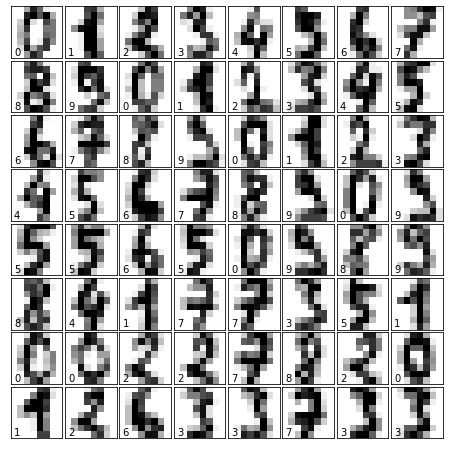

In [2]:
digits = load_digits() #加载数据
#绘制图像
fig = plt.figure(figsize=(6, 6))  # 设置图像的大小
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# 设置图像个数以及大小
for i in range(64): #展示前64个图像
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary) #此处cmap设置颜色，binary表示二值图像
    # 给图像贴上标签值
    ax.text(0, 7, str(digits.target[i]))
plt.show()

### (3)创建Sigmoid函数

In [3]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

### (4)可视化错误分类图像函数

In [4]:
def visualize(dataset,i):
    #cv.imshow('img',dataset.images[i])
    #cv.waitKey()
    plt.imshow(dataset.images[i],cmap=plt.cm.binary) #显示该错误分类的图像
    plt.show()

### (5)创建训练模型
**此处：函数可以自己传入学习模型参数。  
其中：该训练函数times为训练次数，默认为2000次；num为训练样本个数，可自设；alpha为学习速率，默认为0.01；n为多元回归的元数，由于此处是0-9，所以默认为10。**

In [5]:
def train_logistic(dataset,targets,times=2000,num=0,alpha=0.01,n=10):
#times为训练次数，默认为2000次;num为训练样本个数，可自设;alpha为学习速率，默认为0.01;n为多元回归的元数，由于此处是0-9，所以默认为10
    if num==0:
        num=int((1/2)*(np.shape(dataset)[0])) #num为训练样本个数，默认为1/2的样本总数
    train_samples=dataset[0:num,:] #存入前num个样本进入
    m=np.shape(dataset)[1] #获得一个样本维度
    weights=np.ones((n,m))  #因为对于多元回归，所以此处应创立10行以储存不同的weights
    b=np.ones(n)   #因为对于多元回归，此处应创立10行以储存不同的b
    for i in range(0,10): #开始循环训练,此处i代表数字
        target=np.copy(targets[:num]) #将训练样本的标签存入
        judge=target[:]
        for j in range(num):
            if i==target[j]: #判断target与哪个数字相同
                judge[j]=1   #储存判断结果
            else:
                judge[j]=0   #储存判断结果
        for k in range(times):
            data_index=list(range(num)) #创建一个sum个样本个数的数组，存进来每一个数据的下标
            rand_index=np.random.randint(0,len(data_index))#随机选取下标
            error=judge[rand_index]-sigmoid(sum(weights[i]*train_samples[rand_index])+b[i]) #梯度上升进行计算
            weights[i]+=alpha*error*train_samples[rand_index]
            b[i]+=alpha*error
            del(data_index[rand_index])
    return weights,b #返回了权值w和偏移b的十个对应数组

### (6)多元预测模型
**此处：函数可以自己传入学习模型参数。  
其中：dataset为数据集，num_predict为预测数据个数，默认为100个。**

In [6]:
def dataset_predict(dataset_origin,dataset,targets,num_predict=100):
#num_predict为预测数据个数，默认为100个
    weights,b=train_logistic(dataset,targets)
    prdict_data=dataset[-1-num_predict:-1] #取数据集中最后num_predict个样本进行预测
    max_wb=np.empty(num_predict) #找到最大可能性的wb将储存在这里，现在它是随机生成的
    for i in range(num_predict): #循环次数等于预测样本数
        maybe=np.zeros(10) #每个数据对应10个可能性
        for j in range(10): #循环10种分类权值w和偏移b，然后取可能性最大的
            maybe[j]=sigmoid(sum(weights[j]*prdict_data[i])+b[j])#找出每个数据对应的10种可能性
        max_wb[i]=np.argmax(maybe) #找出最大可能性的w和b
    accurary,wrong=0,0
    for i in range(num_predict):
           if targets[-1-num_predict+i]==max_wb[i]:
               print(f'第{i+1}次预测,真值为{targets[-1-num_predict+i]},预测值为{max_wb[i]}')
               accurary+=1
           else:
               print(f'第{i+1}次预测,真值为{targets[-1-num_predict+i]},预测值为{max_wb[i]}    错')
               visualize(dataset_origin,-1-num_predict+i)
               wrong+=1
    print(f'本次多元预测模型,共预测{num_predict}个样本，总计正确{accurary}个，错误{wrong}个，正确率为{((accurary/num_predict)*100)}%')

### (6)运行

第1次预测,真值为9,预测值为9.0
第2次预测,真值为0,预测值为0.0
第3次预测,真值为9,预测值为9.0
第4次预测,真值为5,预测值为5.0
第5次预测,真值为5,预测值为5.0
第6次预测,真值为6,预测值为6.0
第7次预测,真值为5,预测值为5.0
第8次预测,真值为0,预测值为0.0
第9次预测,真值为9,预测值为9.0
第10次预测,真值为8,预测值为8.0
第11次预测,真值为9,预测值为9.0
第12次预测,真值为8,预测值为8.0
第13次预测,真值为4,预测值为4.0
第14次预测,真值为1,预测值为1.0
第15次预测,真值为7,预测值为7.0
第16次预测,真值为7,预测值为7.0
第17次预测,真值为3,预测值为7.0    错


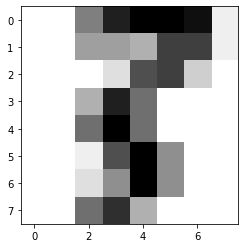

第18次预测,真值为5,预测值为5.0
第19次预测,真值为1,预测值为1.0
第20次预测,真值为0,预测值为0.0
第21次预测,真值为0,预测值为0.0
第22次预测,真值为2,预测值为2.0
第23次预测,真值为2,预测值为2.0
第24次预测,真值为7,预测值为7.0
第25次预测,真值为8,预测值为8.0
第26次预测,真值为2,预测值为2.0
第27次预测,真值为0,预测值为0.0
第28次预测,真值为1,预测值为1.0
第29次预测,真值为2,预测值为2.0
第30次预测,真值为6,预测值为6.0
第31次预测,真值为3,预测值为8.0    错


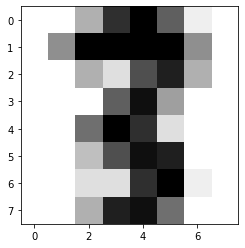

第32次预测,真值为3,预测值为8.0    错


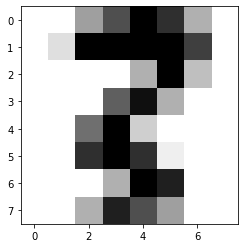

第33次预测,真值为7,预测值为7.0
第34次预测,真值为3,预测值为3.0
第35次预测,真值为3,预测值为8.0    错


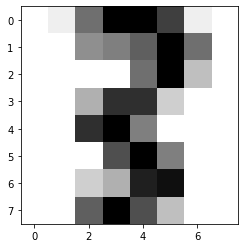

第36次预测,真值为4,预测值为4.0
第37次预测,真值为6,预测值为6.0
第38次预测,真值为6,预测值为6.0
第39次预测,真值为6,预测值为6.0
第40次预测,真值为4,预测值为4.0
第41次预测,真值为9,预测值为9.0
第42次预测,真值为1,预测值为1.0
第43次预测,真值为5,预测值为5.0
第44次预测,真值为0,预测值为0.0
第45次预测,真值为9,预测值为9.0
第46次预测,真值为5,预测值为5.0
第47次预测,真值为2,预测值为3.0    错


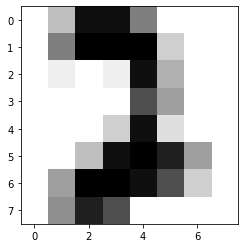

第48次预测,真值为8,预测值为8.0
第49次预测,真值为2,预测值为2.0
第50次预测,真值为0,预测值为0.0
第51次预测,真值为0,预测值为0.0
第52次预测,真值为1,预测值为1.0
第53次预测,真值为7,预测值为7.0
第54次预测,真值为6,预测值为6.0
第55次预测,真值为3,预测值为3.0
第56次预测,真值为2,预测值为2.0
第57次预测,真值为1,预测值为1.0
第58次预测,真值为7,预测值为7.0
第59次预测,真值为4,预测值为4.0
第60次预测,真值为6,预测值为6.0
第61次预测,真值为3,预测值为3.0
第62次预测,真值为1,预测值为1.0
第63次预测,真值为3,预测值为3.0
第64次预测,真值为9,预测值为9.0
第65次预测,真值为1,预测值为1.0
第66次预测,真值为7,预测值为7.0
第67次预测,真值为6,预测值为6.0
第68次预测,真值为8,预测值为8.0
第69次预测,真值为4,预测值为4.0
第70次预测,真值为3,预测值为5.0    错


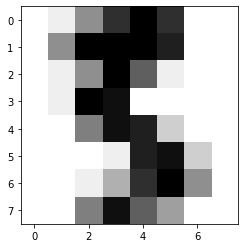

第71次预测,真值为1,预测值为1.0
第72次预测,真值为4,预测值为4.0
第73次预测,真值为0,预测值为0.0
第74次预测,真值为5,预测值为5.0
第75次预测,真值为3,预测值为3.0
第76次预测,真值为6,预测值为6.0
第77次预测,真值为9,预测值为9.0
第78次预测,真值为6,预测值为6.0
第79次预测,真值为1,预测值为1.0
第80次预测,真值为7,预测值为7.0
第81次预测,真值为5,预测值为5.0
第82次预测,真值为4,预测值为4.0
第83次预测,真值为4,预测值为4.0
第84次预测,真值为7,预测值为7.0
第85次预测,真值为2,预测值为2.0
第86次预测,真值为8,预测值为3.0    错


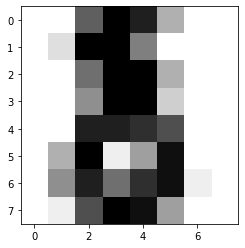

第87次预测,真值为2,预测值为2.0
第88次预测,真值为2,预测值为2.0
第89次预测,真值为5,预测值为5.0
第90次预测,真值为7,预测值为7.0
第91次预测,真值为9,预测值为9.0
第92次预测,真值为5,预测值为5.0
第93次预测,真值为4,预测值为4.0
第94次预测,真值为8,预测值为8.0
第95次预测,真值为8,预测值为8.0
第96次预测,真值为4,预测值为4.0
第97次预测,真值为9,预测值为9.0
第98次预测,真值为0,预测值为0.0
第99次预测,真值为8,预测值为8.0
第100次预测,真值为9,预测值为9.0
本次多元预测模型,共预测100个样本，总计正确93个，错误7个，正确率为93.0%


In [7]:
data=digits.data
targets=digits.target
dataset_predict(digits,data,targets)

### 注释
在完成作业的时候，我先查询了sklearn的digits数据集，知道其是Bunch类型，相当于一个字典。一共有'data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'几种Keys。每种keys对应不同的文件。    
(1)images为ndarray类型，保存8*8的图像，里面的元素是float64类型，共有1797张图片。  
(2)data为ndarray类型，将images按行展开成一行，共有1797行。  
(3)target为ndarray类型，指明每张图片的标签，也就是每张图片代表的数字。  
(4)target_names为ndarray类型，数据集中所有标签值

其次是一开始处理完遇到的bug后，程序能够运行，但预测精准度只有10%左右;
然后我又一步步检查代码，看了两次才发现是有个地方数组的问题，不应该直接赋值，而应该用np.copy

<big>**可以发现自己写的回归代码，不仅运行速度较慢，而且正确率并不高，多次测试的结果都在90%左右，所以接下来与sklearn的回归代码进行对比，看看它要如何碾压我这一段写了多半天的代码。**</big>

## 2.Sklearn算法
### (1)导入第三方库

In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

### (2)导入加载数据

In [9]:
digits = load_digits()

### (3)预处理(准备学习与预测数据)
**此处为了对比我敲打的代码，我选择了与第一问同样的学习数据、并同时选取了同样100个数据进行预测，让我们看看Sklearn需要用多长时间**

In [10]:
num=int((1/2)*(np.shape(digits.data)[0])) #抽取一半的数据进行学习，与第一问相同
train_data=digits.data[:num] #将学习需用的数据储存
train_data_target=digits.target[:num] #将学习的数据标签储存
num_predict=100 #预测数据数量，与第一问相同
predict_data=digits.data[-1-num_predict:-1] #将需要预测数据储存
predict_data_target=digits.target[-1-num_predict:-1] #将预测数据标签储存，以对比正确度

### (4)调用Sklearn训练

第1次预测,真值为9,预测值为9
第2次预测,真值为0,预测值为0
第3次预测,真值为9,预测值为9
第4次预测,真值为5,预测值为5
第5次预测,真值为5,预测值为5
第6次预测,真值为6,预测值为6
第7次预测,真值为5,预测值为5
第8次预测,真值为0,预测值为0
第9次预测,真值为9,预测值为9
第10次预测,真值为8,预测值为8
第11次预测,真值为9,预测值为9
第12次预测,真值为8,预测值为8
第13次预测,真值为4,预测值为4
第14次预测,真值为1,预测值为1
第15次预测,真值为7,预测值为7
第16次预测,真值为7,预测值为7
第17次预测,真值为3,预测值为8    错


/Users/rockyy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


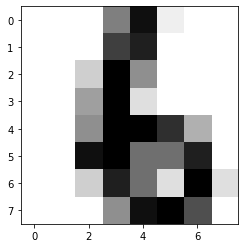

第18次预测,真值为5,预测值为5
第19次预测,真值为1,预测值为1
第20次预测,真值为0,预测值为0
第21次预测,真值为0,预测值为0
第22次预测,真值为2,预测值为2
第23次预测,真值为2,预测值为2
第24次预测,真值为7,预测值为7
第25次预测,真值为8,预测值为8
第26次预测,真值为2,预测值为2
第27次预测,真值为0,预测值为0
第28次预测,真值为1,预测值为1
第29次预测,真值为2,预测值为2
第30次预测,真值为6,预测值为6
第31次预测,真值为3,预测值为8    错


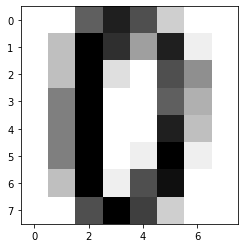

第32次预测,真值为3,预测值为8    错


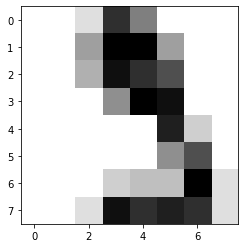

第33次预测,真值为7,预测值为7
第34次预测,真值为3,预测值为5    错


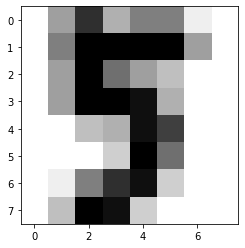

第35次预测,真值为3,预测值为8    错


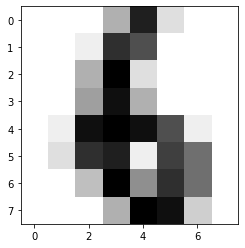

第36次预测,真值为4,预测值为4
第37次预测,真值为6,预测值为6
第38次预测,真值为6,预测值为6
第39次预测,真值为6,预测值为6
第40次预测,真值为4,预测值为4
第41次预测,真值为9,预测值为9
第42次预测,真值为1,预测值为1
第43次预测,真值为5,预测值为5
第44次预测,真值为0,预测值为0
第45次预测,真值为9,预测值为9
第46次预测,真值为5,预测值为5
第47次预测,真值为2,预测值为2
第48次预测,真值为8,预测值为8
第49次预测,真值为2,预测值为2
第50次预测,真值为0,预测值为0
第51次预测,真值为0,预测值为0
第52次预测,真值为1,预测值为1
第53次预测,真值为7,预测值为7
第54次预测,真值为6,预测值为6
第55次预测,真值为3,预测值为3
第56次预测,真值为2,预测值为2
第57次预测,真值为1,预测值为1
第58次预测,真值为7,预测值为4    错


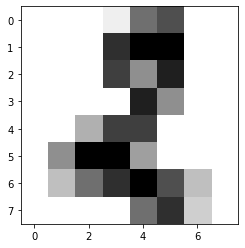

第59次预测,真值为4,预测值为4
第60次预测,真值为6,预测值为6
第61次预测,真值为3,预测值为3
第62次预测,真值为1,预测值为1
第63次预测,真值为3,预测值为3
第64次预测,真值为9,预测值为9
第65次预测,真值为1,预测值为1
第66次预测,真值为7,预测值为7
第67次预测,真值为6,预测值为6
第68次预测,真值为8,预测值为8
第69次预测,真值为4,预测值为4
第70次预测,真值为3,预测值为5    错


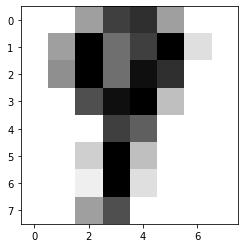

第71次预测,真值为1,预测值为1
第72次预测,真值为4,预测值为4
第73次预测,真值为0,预测值为0
第74次预测,真值为5,预测值为5
第75次预测,真值为3,预测值为3
第76次预测,真值为6,预测值为6
第77次预测,真值为9,预测值为9
第78次预测,真值为6,预测值为6
第79次预测,真值为1,预测值为1
第80次预测,真值为7,预测值为7
第81次预测,真值为5,预测值为5
第82次预测,真值为4,预测值为4
第83次预测,真值为4,预测值为4
第84次预测,真值为7,预测值为7
第85次预测,真值为2,预测值为2
第86次预测,真值为8,预测值为8
第87次预测,真值为2,预测值为2
第88次预测,真值为2,预测值为2
第89次预测,真值为5,预测值为5
第90次预测,真值为7,预测值为7
第91次预测,真值为9,预测值为9
第92次预测,真值为5,预测值为5
第93次预测,真值为4,预测值为4
第94次预测,真值为8,预测值为8
第95次预测,真值为8,预测值为8
第96次预测,真值为4,预测值为4
第97次预测,真值为9,预测值为9
第98次预测,真值为0,预测值为0
第99次预测,真值为8,预测值为8
第100次预测,真值为9,预测值为9
本次多元预测模型,共预测100个样本，总计正确93个，错误7个，正确率为93.0%


In [11]:
logic=LogisticRegression()
logic.fit(train_data, train_data_target) #训练
predict_result=logic.predict(predict_data) #预测
predict_accuracy=accuracy_score(predict_data_target,predict_result) #预测准确率
accuracy,wrong=0,0
for i in range(len(predict_data)):
    if predict_data_target[i] == predict_result[i]:
        print(f'第{i+1}次预测,真值为{predict_data_target[i]},预测值为{predict_result[i]}')
        accuracy += 1
    else:
        print(f'第{i+1}次预测,真值为{predict_data_target[i]},预测值为{predict_result[i]}    错')
        visualize(digits,i)
        wrong += 1
#print(predict_accuracy)
print(f'本次多元预测模型,共预测{num_predict}个样本，总计正确{accuracy}个，错误{wrong}个，正确率为{(predict_accuracy*100)}%')

### 注释
程序在引用第三方库的时候报错，在网上查询了，解释该报错：  
迭代总数达到限制。增加迭代次数（最大值）或缩放数据.scikit-learn版本问题导致的匹配警告和收敛警告，调用的函数和方法已经有改变，暂时不处理也不会影响程序运行。建议升级版本或者修改为最新版本的用法，合理使用库函数!

<big>**虽然看起来Sklearn的正确率与自己写的代码也差不多，但是让我们来对比下程序运行时间:**</big>

**自己的程序：**

In [12]:
#导入第三方库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import time

time1=time.time()

digits = load_digits()

def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def train_logistic(dataset,times=2000,num=0,alpha=0.01,n=10):
    if num==0:
        num=int((1/2)*(np.shape(dataset.data)[0])) #num为训练样本个数，默认为1/2的样本总数
    train_samples=dataset.data[0:num,:] #存入前num个样本进入
    m=np.shape(dataset.data)[1] #获得一个样本维度
    weights=np.ones((n,m))  #因为对于多元回归，所以此处应创立10行以储存不同的weights
    b=np.ones(n)   #因为对于多元回归，此处应创立10行以储存不同的b
    for i in range(0,10): #开始循环训练,此处i代表数字
        target=np.copy(dataset.target[:num]) #将训练样本的标签存入
        judge=target[:]
        for j in range(num):
            if i==target[j]: #判断target与哪个数字相同
                judge[j]=1   #储存判断结果
            else:
                judge[j]=0   #储存判断结果
        for k in range(times):
            data_index=list(range(num)) #创建一个sum个样本个数的数组，存进来每一个数据的下标
            rand_index=np.random.randint(0,len(data_index))#随机选取下标
            error=judge[rand_index]-sigmoid(sum(weights[i]*train_samples[rand_index])+b[i]) #梯度上升进行计算
            weights[i]+=alpha*error*train_samples[rand_index]
            b[i]+=alpha*error
            del(data_index[rand_index])
    return weights,b #返回了权值w和偏移b的十个对应数组

    
#多元模型预测
def dataset_predict(dataset,num_predict=100):
#num_predict为预测数据个数，默认为100个
    weights,b=train_logistic(dataset)
    prdict_data=dataset.data[-1-num_predict:-1] #取数据集中最后num_predict个样本进行预测
    max_wb=np.empty(num_predict) #找到最大可能性的wb将储存在这里，现在它是随机生成的
    for i in range(num_predict): #循环次数等于预测样本数
        maybe=np.zeros(10) #每个数据对应10个可能性
        for j in range(10): #循环10种分类权值w和偏移b，然后取可能性最大的
            maybe[j]=sigmoid(sum(weights[j]*prdict_data[i])+b[j])#找出每个数据对应的10种可能性
        max_wb[i]=np.argmax(maybe) #找出最大可能性的w和b
    accurary,wrong=0,0
    for i in range(num_predict):
           if digits.target[-1-num_predict+i]==max_wb[i]:
               #print(f'第{i+1}次预测,真值为{digits.target[-1-num_predict+i]},预测值为{max_wb[i]}')
               accurary+=1
           else:
               #print(f'第{i+1}次预测,真值为{digits.target[-1-num_predict+i]},预测值为{max_wb[i]}    错')
               wrong+=1
    #print(f'本次多元预测模型,共预测{num_predict}个样本，总计正确{accurary}个，错误{wrong}个，正确率为{((accurary/num_predict)*100)}%')

dataset_predict(digits)
print(f'程序运行时间：{time.time()-time1}s')


程序运行时间：0.6074886322021484s


Sklearn的程序：

In [13]:
#导入第三方库
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

time1=time.time()

digits = load_digits()

num=int((1/2)*(np.shape(digits.data)[0])) #抽取一半的数据进行学习，与第一问相同
train_data=digits.data[:num] #将学习需用的数据储存
train_data_target=digits.target[:num] #将学习的数据标签储存
num_predict=100 #预测数据数量，与第一问相同
predict_data=digits.data[-1-num_predict:-1] #将需要预测数据储存
predict_data_target=digits.target[-1-num_predict:-1] #将预测数据标签储存，以对比正确度

#调用Sklearn训练
logic=LogisticRegression()
logic.fit(train_data, train_data_target) #训练
predict_result=logic.predict(predict_data) #预测
predict_accuracy=accuracy_score(predict_data_target,predict_result) #预测准确率
#accuracy,wrong=0,0
#for i in range(len(predict_data)):
    #if predict_data_target[i] == predict_result[i]:
        #print(f'第{i+1}次预测,真值为{predict_data_target[i]},预测值为{predict_result[i]}')
        #accuracy += 1
    #else:
        #print(f'第{i+1}次预测,真值为{predict_data_target[i]},预测值为{predict_result[i]}    错')
        #wrong += 1
#print(predict_accuracy)
#print(f'本次多元预测模型,共预测{num_predict}个样本，总计正确{accuracy}个，错误{wrong}个，正确率为{(predict_accuracy*100)}%')
print(f'程序运行时间：{time.time()-time1}s')






程序运行时间：0.12247300148010254s


/Users/rockyy/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 总结：
&emsp;&emsp;<big>**可以发现在自己的代码运行时间是Sklearn代码的5-6倍。就拿此次小数据样本来说，虽在精度上Sklearn没有太大优势，但是在时间上Sklearn还是展现了其强大的一面。  
&emsp;&emsp;另外，虽然自己编写代码现在网上查询了很多资料，期间也debug了很久，但是当自己完成后感觉还是不错的。特别是当我在函数定义时添加了很多可手动输入的变量，比如学习的数量，学习的次数等等，自己在后面尝试很多不同的输入，得到不同的学习结果，整个过程还是很有趣的。**</big>
